# Am_Expert

# Getting started

## Importing the libraries

In [1]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy.random as nr
import sklearn.model_selection as ms
import sklearn.metrics as sklm
from sklearn import preprocessing
from sklearn import linear_model
import scipy.stats as ss
import math
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [0]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/Am_expert")

In [0]:
import warnings
warnings.filterwarnings("ignore")

## Extracting training data from zip

In [5]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "./Input/train_AUpWtIz.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zipfile: 
    # printing all the contents of the zip file 
    zipfile.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zipfile.extractall() 
    print('Done!')

File Name                                             Modified             Size
coupon_item_mapping.csv                        2019-09-27 22:15:18       828513
__MACOSX/                                      2019-09-27 23:58:30            0
__MACOSX/._coupon_item_mapping.csv             2019-09-27 22:15:18          268
customer_demographics.csv                      2019-09-27 22:15:18        17108
__MACOSX/._customer_demographics.csv           2019-09-27 22:15:18          212
campaign_data.csv                              2019-09-27 23:58:06          708
__MACOSX/._campaign_data.csv                   2019-09-27 23:58:06          244
train.csv                                      2019-09-27 22:15:34      1490150
__MACOSX/._train.csv                           2019-09-27 22:15:34          268
customer_transaction_data.csv                  2019-09-27 23:45:30     51565654
__MACOSX/._customer_transaction_data.csv       2019-09-27 23:45:30          212
item_data.csv                           

# Data preprocessing

In [0]:
# Defining a function for quick glimpse of data
def var_summary1(data, var):
    var_name = var
    var_type = data[var].dtypes
    total_records = len(data[var])
    unique_records = len(data[var].unique())
    Missing_value = data[var].isnull().sum()
    return var_name, var_type, total_records, unique_records, Missing_value

def var_summary2(data):
    var_list = data.columns.tolist()
    result=[]
    for i in var_list:
        var_name, var_type, total_records, unique_records, Missing_value = var_summary1(data, i)
        result.append((var_name, var_type, total_records, unique_records, Missing_value))
        del var_name, var_type, total_records, unique_records, Missing_value
    return result
    del var_list

## Train data

In [7]:
# Reading the file
train = pd.read_csv("train.csv")
print("No of rows and columns in train:", train.shape)

No of rows and columns in train: (78369, 5)


In [8]:
# Top 5 rows
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [9]:
# Variable summary
var_result = var_summary2(train)
var_summary = pd.DataFrame(var_result)
var_summary.columns = ['Variable Name', 'Variable Type', 'Total records', 'Unique records', 'Missing records']
var_summary

,Variable Name,Variable Type,Total records,Unique records,Missing records
0,id,int64,78369,78369,0
1,campaign_id,int64,78369,18,0
2,coupon_id,int64,78369,866,0
3,customer_id,int64,78369,1428,0
4,redemption_status,int64,78369,2,0


## Campaign data

In [10]:
# Reading the file
campaign_data = pd.read_csv("campaign_data.csv")
print("No of rows and columns in campaign_data:", campaign_data.shape)

No of rows and columns in campaign_data: (28, 4)


In [11]:
# Top 5 rows
campaign_data.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [12]:
# Variable summary
var_result = var_summary2(campaign_data)
var_summary = pd.DataFrame(var_result)
var_summary.columns = ['Variable Name', 'Variable Type', 'Total records', 'Unique records', 'Missing records']
var_summary

,Variable Name,Variable Type,Total records,Unique records,Missing records
0,campaign_id,int64,28,28,0
1,campaign_type,object,28,2,0
2,start_date,object,28,25,0
3,end_date,object,28,26,0


### Feature engineering

In [0]:
### Feature engineering
# campaign_type
campaign_data['campaign_type'] = np.where(campaign_data['campaign_type'] == 'Y', 1, 0)

# campaign date
campaign_data['start_date'] = pd.to_datetime(campaign_data['start_date'])
campaign_data['start_date_yr_month'] = campaign_data['start_date'].apply(lambda x: x.strftime('%B-%Y'))
campaign_data['end_date'] = pd.to_datetime(campaign_data['end_date'])
campaign_data['end_date_yr_month'] = campaign_data['end_date'].apply(lambda x: x.strftime('%B-%Y'))
campaign_data['campaign_days'] = (campaign_data['end_date'] - campaign_data['start_date']).dt.days
campaign_data = campaign_data.drop(['start_date', 'end_date'], axis = 1)

# Dummy encoding
dummy_col = ['start_date_yr_month', 'end_date_yr_month']
campaign_data = pd.concat([campaign_data, pd.get_dummies(campaign_data[dummy_col], prefix = dummy_col)], axis = 1).drop(dummy_col, axis = 1)

In [14]:
# feature engineering
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
#campaign_data['campaign_days'] = scaler1.fit_transform(np.array(campaign_data['campaign_days']).reshape(-1,1))
campaign_data['campaign_days'] = scaler1.fit_transform(campaign_data[['campaign_days']])
campaign_data.head()

,campaign_id,campaign_type,campaign_days,start_date_yr_month_April-2013,start_date_yr_month_August-2012,start_date_yr_month_August-2013,start_date_yr_month_December-2012,start_date_yr_month_December-2013,start_date_yr_month_February-2013,start_date_yr_month_January-2013,start_date_yr_month_July-2013,start_date_yr_month_May-2013,start_date_yr_month_November-2012,start_date_yr_month_November-2013,start_date_yr_month_October-2013,start_date_yr_month_September-2012,start_date_yr_month_September-2013,end_date_yr_month_April-2013,end_date_yr_month_August-2013,end_date_yr_month_December-2013,end_date_yr_month_February-2013,end_date_yr_month_January-2013,end_date_yr_month_July-2013,end_date_yr_month_May-2013,end_date_yr_month_November-2012,end_date_yr_month_November-2013,end_date_yr_month_October-2012,end_date_yr_month_October-2013,end_date_yr_month_September-2012,end_date_yr_month_September-2013
0,24,1,0.740977,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,25,1,0.681529,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,20,1,0.889597,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,23,1,0.819533,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,21,1,0.681529,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


## Coupon_item_mapping

In [15]:
# Reading the file
coupon_item_mapping = pd.read_csv("coupon_item_mapping.csv")
print("No of rows and columns in coupon_item_mapping:", coupon_item_mapping.shape)

# Top 5 rows
coupon_item_mapping.head()

No of rows and columns in coupon_item_mapping: (92663, 2)


,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [16]:
# Variable summary
var_result = var_summary2(coupon_item_mapping)
var_summary = pd.DataFrame(var_result)
var_summary.columns = ['Variable Name', 'Variable Type', 'Total records', 'Unique records', 'Missing records']
var_summary

,Variable Name,Variable Type,Total records,Unique records,Missing records
0,coupon_id,int64,92663,1116,0
1,item_id,int64,92663,36289,0


### Feature Engineering

In [17]:
### Feature Engineering
coupon_item_mapping = coupon_item_mapping.drop_duplicates(keep = 'last')
print("No of rows and columns in coupon_item_mapping:", coupon_item_mapping.shape)

coupon_item_mapping_new = pd.DataFrame(coupon_item_mapping.groupby('coupon_id')['item_id'].nunique())
coupon_item_mapping_new = coupon_item_mapping_new.reset_index()
coupon_item_mapping_new.columns = ['coupon_id', 'Unique_item_by_coupon']
print("No of rows and columns in coupon_item_mapping:", coupon_item_mapping_new.shape)
coupon_item_mapping_new.head()

No of rows and columns in coupon_item_mapping: (92663, 2)
No of rows and columns in coupon_item_mapping: (1116, 2)


,coupon_id,Unique_item_by_coupon
0,1,39
1,2,2
2,3,17
3,4,24
4,5,7


## Customer demographics

In [18]:
# Reading the file
customer_demographics = pd.read_csv("customer_demographics.csv")
print("No of rows and columns in customer_demographics:", customer_demographics.shape)

# Top 5 rows
customer_demographics.head()

No of rows and columns in customer_demographics: (760, 7)


,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [19]:
# Variable summary
var_result = var_summary2(customer_demographics)
var_summary = pd.DataFrame(var_result)
var_summary.columns = ['Variable Name', 'Variable Type', 'Total records', 'Unique records', 'Missing records']
var_summary

,Variable Name,Variable Type,Total records,Unique records,Missing records
0,customer_id,int64,760,760,0
1,age_range,object,760,6,0
2,marital_status,object,760,3,329
3,rented,int64,760,2,0
4,family_size,object,760,5,0
5,no_of_children,object,760,4,538
6,income_bracket,int64,760,12,0


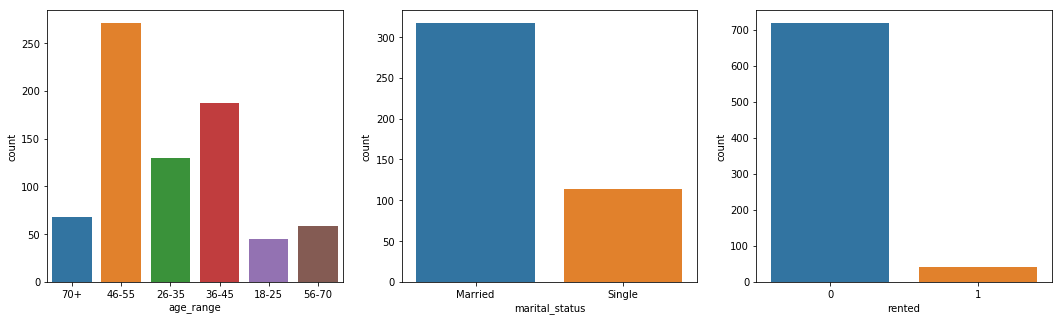

In [20]:
# Checking freq distributon
plt.figure(figsize=(18,5));
plt.subplot(1, 3, 1)
sns.countplot(customer_demographics['age_range']);
plt.subplot(1, 3, 2)
sns.countplot(customer_demographics['marital_status']);
plt.subplot(1, 3, 3)
sns.countplot(customer_demographics['rented']);

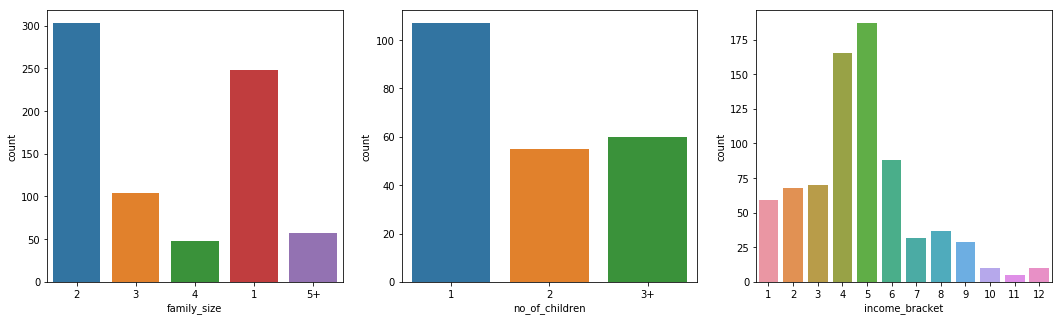

In [21]:
plt.figure(figsize=(18,5));
plt.subplot(1, 3, 1)
sns.countplot(customer_demographics['family_size']);
plt.subplot(1, 3, 2)
sns.countplot(customer_demographics['no_of_children']);
plt.subplot(1, 3, 3)
sns.countplot(customer_demographics['income_bracket']);

In [22]:
# Freq summary by family size x no_of_children
pd.crosstab(customer_demographics['family_size'], customer_demographics['no_of_children'], dropna=False)

no_of_children,1,2,3+
family_size,,,
2,13,0,0
3,94,10,0
4,0,45,3
5+,0,0,57


### Feature Engineering

In [23]:
### Feature Engineering
# Missing value imputation
customer_demographics['marital_status'] = customer_demographics['marital_status'].fillna('Unknown')
customer_demographics['no_of_children'] = customer_demographics['no_of_children'].fillna('0')

# Dummy encoding
customer_demographics_dummy_col = ['age_range','marital_status','family_size','no_of_children']
customer_demographics = pd.concat([customer_demographics, pd.get_dummies(customer_demographics[customer_demographics_dummy_col], 
                                                         prefix = customer_demographics_dummy_col)], axis = 1).drop(customer_demographics_dummy_col, axis = 1)

# Feature scaling: Income bracker
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler()

customer_demographics['income_bracket'] = scaler2.fit_transform(customer_demographics[['income_bracket']])

customer_demographics.head()

,customer_id,rented,income_bracket,age_range_18-25,age_range_26-35,age_range_36-45,age_range_46-55,age_range_56-70,age_range_70+,marital_status_Married,marital_status_Single,marital_status_Unknown,family_size_1,family_size_2,family_size_3,family_size_4,family_size_5+,no_of_children_0,no_of_children_1,no_of_children_2,no_of_children_3+
0,1,0,0.272727,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0
1,6,0,0.363636,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
2,7,0,0.181818,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3,8,0,0.454545,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,10,0,0.363636,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0


## Customer transaction data & Item data

In [24]:
# Reading the data
customer_transaction_data = pd.read_csv("customer_transaction_data.csv")
print("No of rows and columns in customer_transaction_data:", customer_transaction_data.shape)

# Top 5 rows
customer_transaction_data.head()

No of rows and columns in customer_transaction_data: (1324566, 7)


,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [25]:
# Variable summary
var_result = var_summary2(customer_transaction_data)
var_summary = pd.DataFrame(var_result)
var_summary.columns = ['Variable Name', 'Variable Type', 'Total records', 'Unique records', 'Missing records']
var_summary

,Variable Name,Variable Type,Total records,Unique records,Missing records
0,date,object,1324566,549,0
1,customer_id,int64,1324566,1582,0
2,item_id,int64,1324566,74063,0
3,quantity,int64,1324566,9252,0
4,selling_price,float64,1324566,4923,0
5,other_discount,float64,1324566,1418,0
6,coupon_discount,float64,1324566,232,0


In [26]:
# Reading the file
item_data = pd.read_csv("item_data.csv")
print("No of rows and columns in item_data:", item_data.shape)

# Top 5 rows
item_data.head()

No of rows and columns in item_data: (74066, 4)


,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [27]:
# Variable summary
var_result = var_summary2(item_data)
var_summary = pd.DataFrame(var_result)
var_summary.columns = ['Variable Name', 'Variable Type', 'Total records', 'Unique records', 'Missing records']
var_summary

,Variable Name,Variable Type,Total records,Unique records,Missing records
0,item_id,int64,74066,74066,0
1,brand,int64,74066,5528,0
2,brand_type,object,74066,2,0
3,category,object,74066,19,0


### Feature engineering

In [28]:
# Merging item details into customer transaction
customer_transaction_data = pd.merge(customer_transaction_data, item_data, on = 'item_id', how = 'left')

# creating total value
customer_transaction_data['Total_value'] = customer_transaction_data['quantity'] *  customer_transaction_data['selling_price']

customer_transaction_data['MRP'] = customer_transaction_data['selling_price'] - customer_transaction_data['other_discount'] - customer_transaction_data['coupon_discount']
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category,Total_value,MRP
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,56,Local,Natural Products,35.26,45.95
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0,56,Local,Natural Products,53.43,67.32
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0,524,Established,Grocery,106.50,120.75
3,2012-01-02,1501,33647,1,67.32,0.00,0.0,1134,Established,Grocery,67.32,67.32
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0,524,Established,Grocery,71.24,99.38


In [29]:
df1 = customer_transaction_data.groupby(['item_id'])['MRP'].median()
df1 = df1.reset_index()
print(df1.shape)
df1.head()

(74063, 2)


,item_id,MRP
0,1,124.31
1,2,35.26
2,3,56.64
3,4,54.85
4,5,81.57


In [0]:
def desc_stats(x):
    print("count :", len(x))
    print("Mean :", np.mean(x))
    print("Median :", np.median(x))
    print("1st quartile :", np.percentile(x, 25))
    print("3rd quartile :", np.percentile(x, 75))
    print("90th percentile :", np.percentile(x, 90))
    print("95th percentile :", np.percentile(x, 95))
    print("99th percentile :", np.percentile(x, 99))
    print("Minimum :", min(x))
    print("Maximum :", max(x))

In [31]:
desc_stats(df1.MRP)

count : 74063
Mean : 159.9795158851211
Median : 106.51
1st quartile : 70.88
3rd quartile : 177.74
90th percentile : 318.8
95th percentile : 427.08000000000004
99th percentile : 890.14
Minimum : 0.36
Maximum : 19590.64


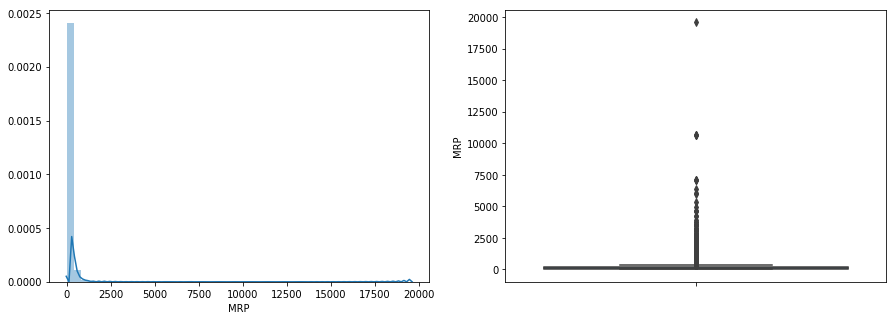

In [32]:
plt.figure(figsize = (15,5))
plt.subplot(1, 2, 1)
sns.distplot(df1.MRP);

plt.subplot(1, 2, 2)
sns.boxplot(y = df1.MRP);

In [33]:
q3 = np.percentile(df1.MRP, 95)
print(q3)
df1['Premium_Mass'] = np.where(df1['MRP'] > q3, 'Premium', 'Mass')
df1.head()

427.08000000000004


,item_id,MRP,Premium_Mass
0,1,124.31,Mass
1,2,35.26,Mass
2,3,56.64,Mass
3,4,54.85,Mass
4,5,81.57,Mass


In [34]:
df1['Premium_Mass'].value_counts()

Mass       70479
Premium     3584
Name: Premium_Mass, dtype: int64

In [35]:
df1 = df1[['item_id', 'Premium_Mass']]
customer_transaction_data = pd.merge(customer_transaction_data, df1, on = 'item_id', how = 'left')
customer_transaction_data['date'] = pd.to_datetime(customer_transaction_data['date'])
customer_transaction_data['transaction_yr_month'] = customer_transaction_data['date'].apply(lambda x: x.strftime('%B-%Y'))
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category,Total_value,MRP,Premium_Mass,transaction_yr_month
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,56,Local,Natural Products,35.26,45.95,Mass,January-2012
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0,56,Local,Natural Products,53.43,67.32,Mass,January-2012
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0,524,Established,Grocery,106.50,120.75,Mass,January-2012
3,2012-01-02,1501,33647,1,67.32,0.00,0.0,1134,Established,Grocery,67.32,67.32,Mass,January-2012
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0,524,Established,Grocery,71.24,99.38,Mass,January-2012


In [36]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-cp36-none-any.whl size=26820 sha256=c309031509debb44d58e2a9fd4b744f8a94f071a5f453824f11e8632be26a7e9
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [37]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

q1 = "select customer_id, COUNT(*) AS total_transaction, SUM(quantity) AS totalquantity , SUM(Total_value) AS totalvalue FROM customer_transaction_data GROUP BY customer_id"
df2 = pysqldf(q1)
df2.head()

,customer_id,total_transaction,totalquantity,totalvalue
0,1,1048,1227,1.239484e+05
1,2,419,474,5.282288e+04
2,3,705,8163,5.107930e+06
3,4,220,280,5.031001e+04
4,5,792,93353,1.073689e+08


In [38]:
df2.dtypes

customer_id            int64
total_transaction      int64
totalquantity          int64
totalvalue           float64
dtype: object

In [39]:
df3 = customer_transaction_data.groupby(['customer_id', 'brand_type'])['Total_value'].agg(['sum'])
df3 = df3.reset_index()
df3 = pd.merge(df3, df2[['customer_id' , 'totalvalue']], on = 'customer_id', how = 'left')
df3['brand_type_cont'] = df3['sum'] / df3['totalvalue']
df3['brand_type'] = df3['brand_type'] + "_cont"
df3 = pd.pivot_table(df3, values='brand_type_cont', index=['customer_id'],columns=['brand_type'], aggfunc=np.sum, fill_value=0)
df3 = df3.reset_index()
df2 = pd.merge(df2, df3, on = 'customer_id', how = 'left')
df2.head()

,customer_id,total_transaction,totalquantity,totalvalue,Established_cont,Local_cont
0,1,1048,1227,1.239484e+05,0.936315,0.063685
1,2,419,474,5.282288e+04,0.851351,0.148649
2,3,705,8163,5.107930e+06,0.026769,0.973231
3,4,220,280,5.031001e+04,0.951381,0.048619
4,5,792,93353,1.073689e+08,0.001084,0.998916


In [40]:
df4 = customer_transaction_data.groupby(['customer_id', 'category'])['Total_value'].agg(['sum'])
df4 = df4.reset_index()
df4 = pd.merge(df4, df2[['customer_id' , 'totalvalue']], on = 'customer_id', how = 'left')
df4['category_cont'] = df4['sum'] / df4['totalvalue']
df4['category'] = df4['category'] + "_cont"
df4 = pd.pivot_table(df4, values='category_cont', index=['customer_id'],columns=['category'], aggfunc=np.sum, fill_value=0)
df4 = df4.reset_index()
df2 = pd.merge(df2, df4, on = 'customer_id', how = 'left')
df2.head()

,customer_id,total_transaction,totalquantity,totalvalue,Established_cont,Local_cont,Alcohol_cont,Bakery_cont,"Dairy, Juices & Snacks_cont",Flowers & Plants_cont,Fuel_cont,Garden_cont,Grocery_cont,Meat_cont,Miscellaneous_cont,Natural Products_cont,Packaged Meat_cont,Pharmaceutical_cont,Prepared Food_cont,Restauarant_cont,Salads_cont,Seafood_cont,Skin & Hair Care_cont,Travel_cont,Vegetables (cut)_cont
0,1,1048,1227,1.239484e+05,0.936315,0.063685,0.0,0.028746,0.010222,0.000000,0.000000,0.000000,0.722338,0.001943,0.000000e+00,0.009121,0.082232,0.127590,0.016610,0.001198,0.0,0.000000,0.000000,0.0,0.0
1,2,419,474,5.282288e+04,0.851351,0.148649,0.0,0.009339,0.005037,0.000000,0.000000,0.000000,0.658616,0.042233,0.000000e+00,0.036258,0.046387,0.181185,0.000000,0.000000,0.0,0.006062,0.014883,0.0,0.0
2,3,705,8163,5.107930e+06,0.026769,0.973231,0.0,0.000000,0.000000,0.000000,0.969663,0.000000,0.025041,0.001517,0.000000e+00,0.000300,0.002235,0.001167,0.000000,0.000000,0.0,0.000070,0.000009,0.0,0.0
3,4,220,280,5.031001e+04,0.951381,0.048619,0.0,0.000000,0.002329,0.000000,0.000000,0.000000,0.627155,0.019937,0.000000e+00,0.003448,0.120914,0.215249,0.000000,0.000000,0.0,0.009466,0.001501,0.0,0.0
4,5,792,93353,1.073689e+08,0.001084,0.998916,0.0,0.000027,0.000013,0.000008,0.998756,0.000001,0.000500,0.000227,9.952605e-07,0.000206,0.000007,0.000236,0.000009,0.000000,0.0,0.000005,0.000003,0.0,0.0


In [41]:
df5 = customer_transaction_data.groupby(['customer_id', 'Premium_Mass'])['Total_value'].agg(['sum'])
df5 = df5.reset_index()
df5 = pd.merge(df5, df2[['customer_id' , 'totalvalue']], on = 'customer_id', how = 'left')
df5['Premium_Mass_cont'] = df5['sum'] / df5['totalvalue']
df5['Premium_Mass'] = df5['Premium_Mass'] + "_cont"
df5 = pd.pivot_table(df5, values='Premium_Mass_cont', index=['customer_id'],columns=['Premium_Mass'], aggfunc=np.sum, fill_value=0)
df5 = df5.reset_index()
df2 = pd.merge(df2, df5, on = 'customer_id', how = 'left')
df2.head()

,customer_id,total_transaction,totalquantity,totalvalue,Established_cont,Local_cont,Alcohol_cont,Bakery_cont,"Dairy, Juices & Snacks_cont",Flowers & Plants_cont,Fuel_cont,Garden_cont,Grocery_cont,Meat_cont,Miscellaneous_cont,Natural Products_cont,Packaged Meat_cont,Pharmaceutical_cont,Prepared Food_cont,Restauarant_cont,Salads_cont,Seafood_cont,Skin & Hair Care_cont,Travel_cont,Vegetables (cut)_cont,Mass_cont,Premium_cont
0,1,1048,1227,1.239484e+05,0.936315,0.063685,0.0,0.028746,0.010222,0.000000,0.000000,0.000000,0.722338,0.001943,0.000000e+00,0.009121,0.082232,0.127590,0.016610,0.001198,0.0,0.000000,0.000000,0.0,0.0,0.997258,0.002742
1,2,419,474,5.282288e+04,0.851351,0.148649,0.0,0.009339,0.005037,0.000000,0.000000,0.000000,0.658616,0.042233,0.000000e+00,0.036258,0.046387,0.181185,0.000000,0.000000,0.0,0.006062,0.014883,0.0,0.0,0.969069,0.030931
2,3,705,8163,5.107930e+06,0.026769,0.973231,0.0,0.000000,0.000000,0.000000,0.969663,0.000000,0.025041,0.001517,0.000000e+00,0.000300,0.002235,0.001167,0.000000,0.000000,0.0,0.000070,0.000009,0.0,0.0,0.030001,0.969999
3,4,220,280,5.031001e+04,0.951381,0.048619,0.0,0.000000,0.002329,0.000000,0.000000,0.000000,0.627155,0.019937,0.000000e+00,0.003448,0.120914,0.215249,0.000000,0.000000,0.0,0.009466,0.001501,0.0,0.0,0.869231,0.130769
4,5,792,93353,1.073689e+08,0.001084,0.998916,0.0,0.000027,0.000013,0.000008,0.998756,0.000001,0.000500,0.000227,9.952605e-07,0.000206,0.000007,0.000236,0.000009,0.000000,0.0,0.000005,0.000003,0.0,0.0,0.001167,0.998833


In [0]:
#df6 = customer_transaction_data.groupby(['customer_id', 'brand'])['Total_value'].agg(['sum'])
#df6 = df6.reset_index()
#df6 = pd.merge(df6, df2[['customer_id' , 'totalvalue']], on = 'customer_id', how = 'left')
#df6['brand_cont'] = df6['sum'] / df6['totalvalue']
#df6['brand'] = df6.brand.map(str) + "_cont"
#df6 = pd.pivot_table(df6, values='brand_cont', index=['customer_id'],columns=['brand'], aggfunc=np.sum, fill_value=0)
#df6 = df6.reset_index()
#df2 = pd.merge(df2, df6, on = 'customer_id', how = 'left')
#df2.head()

In [43]:
df7 = customer_transaction_data.groupby(['customer_id', 'transaction_yr_month'])['Total_value'].agg(['sum'])
df7 = df7.reset_index()
df7 = pd.merge(df7, df2[['customer_id' , 'totalvalue']], on = 'customer_id', how = 'left')
df7['transaction_yr_month_cont'] = df7['sum'] / df7['totalvalue']
df7['transaction_yr_month'] = df7.transaction_yr_month.map(str) + "_cont"
df7 = pd.pivot_table(df7, values='transaction_yr_month_cont', index=['customer_id'],columns=['transaction_yr_month'], aggfunc=np.sum, fill_value=0)
df7 = df7.reset_index()
df2 = pd.merge(df2, df7, on = 'customer_id', how = 'left')
# Feature scaling

scaler3 = MinMaxScaler()
df2['total_transaction'] = scaler3.fit_transform(df2[['total_transaction']])
df2['totalquantity'] = scaler3.fit_transform(df2[['totalquantity']])
df2['totalvalue'] = scaler3.fit_transform(df2[['totalvalue']])

df2.head()

,customer_id,total_transaction,totalquantity,totalvalue,Established_cont,Local_cont,Alcohol_cont,Bakery_cont,"Dairy, Juices & Snacks_cont",Flowers & Plants_cont,Fuel_cont,Garden_cont,Grocery_cont,Meat_cont,Miscellaneous_cont,Natural Products_cont,Packaged Meat_cont,Pharmaceutical_cont,Prepared Food_cont,Restauarant_cont,Salads_cont,Seafood_cont,Skin & Hair Care_cont,Travel_cont,Vegetables (cut)_cont,Mass_cont,Premium_cont,April-2012_cont,April-2013_cont,August-2012_cont,December-2012_cont,February-2012_cont,February-2013_cont,January-2012_cont,January-2013_cont,July-2012_cont,July-2013_cont,June-2012_cont,June-2013_cont,March-2012_cont,March-2013_cont,May-2012_cont,May-2013_cont,November-2012_cont,October-2012_cont,September-2012_cont
0,1,0.218096,0.000435,0.000027,0.936315,0.063685,0.0,0.028746,0.010222,0.000000,0.000000,0.000000,0.722338,0.001943,0.000000e+00,0.009121,0.082232,0.127590,0.016610,0.001198,0.0,0.000000,0.000000,0.0,0.0,0.997258,0.002742,0.055869,0.047268,0.054504,0.088204,0.025076,0.090719,0.0,0.023539,0.048555,0.0,0.086822,0.037232,0.021964,0.097079,0.081730,0.061559,0.044948,0.086046,0.048886
1,2,0.076525,0.000147,0.000010,0.851351,0.148649,0.0,0.009339,0.005037,0.000000,0.000000,0.000000,0.658616,0.042233,0.000000e+00,0.036258,0.046387,0.181185,0.000000,0.000000,0.0,0.006062,0.014883,0.0,0.0,0.969069,0.030931,0.039758,0.146120,0.022698,0.095519,0.000000,0.029441,0.0,0.000000,0.082025,0.0,0.162128,0.061984,0.000000,0.005125,0.072989,0.050750,0.056232,0.017930,0.157301
2,3,0.140896,0.003085,0.001210,0.026769,0.973231,0.0,0.000000,0.000000,0.000000,0.969663,0.000000,0.025041,0.001517,0.000000e+00,0.000300,0.002235,0.001167,0.000000,0.000000,0.0,0.000070,0.000009,0.0,0.0,0.030001,0.969999,0.000398,0.000571,0.003826,0.001318,0.000000,0.001797,0.0,0.000858,0.006300,0.0,0.001744,0.001017,0.000000,0.000425,0.002452,0.969663,0.005446,0.000139,0.004048
3,4,0.031735,0.000073,0.000010,0.951381,0.048619,0.0,0.000000,0.002329,0.000000,0.000000,0.000000,0.627155,0.019937,0.000000e+00,0.003448,0.120914,0.215249,0.000000,0.000000,0.0,0.009466,0.001501,0.0,0.0,0.869231,0.130769,0.178433,0.008482,0.060053,0.030083,0.000000,0.056542,0.0,0.012001,0.136115,0.0,0.075665,0.000000,0.000000,0.000000,0.109884,0.021580,0.031796,0.097471,0.181895
4,5,0.160477,0.035632,0.025470,0.001084,0.998916,0.0,0.000027,0.000013,0.000008,0.998756,0.000001,0.000500,0.000227,9.952605e-07,0.000206,0.000007,0.000236,0.000009,0.000000,0.0,0.000005,0.000003,0.0,0.0,0.001167,0.998833,0.000016,0.000074,0.000093,0.000133,0.000000,0.000066,0.0,0.000141,0.000055,0.0,0.000079,0.142689,0.000000,0.000056,0.000147,0.856200,0.000086,0.000076,0.000088


In [0]:
# Importing test data
test = pd.read_csv("./Input/test_QyjYwdj.csv")
sample_submission = pd.read_csv("./Input/sample_submission_Byiv0dS.csv")

# Creating final data

In [0]:
# Function for merging all data
def final_data(train):
    train = pd.merge(train, campaign_data, on = 'campaign_id', how = 'left')
    train = pd.merge(train, coupon_item_mapping_new, on = 'coupon_id', how = 'left')
    train = pd.merge(train, customer_demographics, on = 'customer_id', how = 'left')
    train = pd.merge(train, df2, on = 'customer_id', how = 'left')
    train = train.drop(['campaign_id', 'coupon_id', 'customer_id'], axis = 1)
    return train

In [46]:
train_fin = final_data(train)
print("Number of rows and columns in training data:", train_fin.shape)
train_fin.head()

Number of rows and columns in training data: (78369, 97)


,id,redemption_status,campaign_type,campaign_days,start_date_yr_month_April-2013,start_date_yr_month_August-2012,start_date_yr_month_August-2013,start_date_yr_month_December-2012,start_date_yr_month_December-2013,start_date_yr_month_February-2013,start_date_yr_month_January-2013,start_date_yr_month_July-2013,start_date_yr_month_May-2013,start_date_yr_month_November-2012,start_date_yr_month_November-2013,start_date_yr_month_October-2013,start_date_yr_month_September-2012,start_date_yr_month_September-2013,end_date_yr_month_April-2013,end_date_yr_month_August-2013,end_date_yr_month_December-2013,end_date_yr_month_February-2013,end_date_yr_month_January-2013,end_date_yr_month_July-2013,end_date_yr_month_May-2013,end_date_yr_month_November-2012,end_date_yr_month_November-2013,end_date_yr_month_October-2012,end_date_yr_month_October-2013,end_date_yr_month_September-2012,end_date_yr_month_September-2013,Unique_item_by_coupon,rented,income_bracket,age_range_18-25,age_range_26-35,age_range_36-45,age_range_46-55,age_range_56-70,age_range_70+,marital_status_Married,marital_status_Single,marital_status_Unknown,family_size_1,family_size_2,family_size_3,family_size_4,family_size_5+,no_of_children_0,no_of_children_1,no_of_children_2,no_of_children_3+,total_transaction,totalquantity,totalvalue,Established_cont,Local_cont,Alcohol_cont,Bakery_cont,"Dairy, Juices & Snacks_cont",Flowers & Plants_cont,Fuel_cont,Garden_cont,Grocery_cont,Meat_cont,Miscellaneous_cont,Natural Products_cont,Packaged Meat_cont,Pharmaceutical_cont,Prepared Food_cont,Restauarant_cont,Salads_cont,Seafood_cont,Skin & Hair Care_cont,Travel_cont,Vegetables (cut)_cont,Mass_cont,Premium_cont,April-2012_cont,April-2013_cont,August-2012_cont,December-2012_cont,February-2012_cont,February-2013_cont,January-2012_cont,January-2013_cont,July-2012_cont,July-2013_cont,June-2012_cont,June-2013_cont,March-2012_cont,March-2013_cont,May-2012_cont,May-2013_cont,November-2012_cont,October-2012_cont,September-2012_cont
0,1,0,0,0.588110,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,125,0.0,0.363636,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.051992,0.040292,0.016532,0.000655,0.999345,0.000000,0.000000,0.000000,0.0,0.999052,0.0,0.000495,0.000123,0.000000,0.000006,0.000131,0.000172,0.000006,0.0,0.000000e+00,0.000015,0.000000,0.0,0.0,0.000698,0.999302,9.295553e-02,0.000034,0.000067,0.000036,0.000016,0.045699,0.00001,0.181056,0.042215,0.047621,0.085252,0.091868,0.000000,0.000043,0.027544,0.195076,0.000038,0.163806,0.026664
1,2,0,0,0.588110,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0.0,0.181818,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.068872,0.004606,0.002970,0.010553,0.989447,0.000000,0.000129,0.000003,0.0,0.988371,0.0,0.003513,0.000302,0.000004,0.000144,0.000382,0.007040,0.000027,0.0,8.246538e-07,0.000084,0.000000,0.0,0.0,0.004644,0.995356,9.580880e-04,0.000339,0.000604,0.000607,0.000000,0.001014,0.00000,0.000445,0.001427,0.000000,0.990667,0.000205,0.001820,0.000286,0.000580,0.000624,0.000191,0.000102,0.000131
2,6,0,1,0.679406,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,67,0.0,0.545455,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.200540,0.000483,0.000041,0.825363,0.174637,0.000000,0.005146,0.003446,0.0,0.000000,0.0,0.658405,0.110270,0.000706,0.039554,0.058997,0.098100,0.022635,0.0,0.000000e+00,0.000294,0.002445,0.0,0.0,0.939081,0.060919,7.895218e-02,0.060626,0.111212,0.083451,0.000000,0.065790,0.00000,0.051640,0.033066,0.000000,0.018122,0.065213,0.063427,0.092927,0.095942,0.022067,0.056905,0.052858,0.047803
3,7,0,0,0.588110,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035562,0.000083,0.000005,0.679653,0.320347,0.012708,0.049538,0.000000,0.0,0.000000,0.0,0.722289,0.000000,0.000000,0.001145,0.063242,0.131246,0.009610,0.0,0.000000e+00,0.000000,0.010222,0.0,0.0,0.950427,0.049573,1.50675

In [47]:
test_fin = final_data(test)
print("Number of rows and columns in test data:", test_fin.shape)
test_fin.head()

Number of rows and columns in test data: (50226, 96)


,id,campaign_type,campaign_days,start_date_yr_month_April-2013,start_date_yr_month_August-2012,start_date_yr_month_August-2013,start_date_yr_month_December-2012,start_date_yr_month_December-2013,start_date_yr_month_February-2013,start_date_yr_month_January-2013,start_date_yr_month_July-2013,start_date_yr_month_May-2013,start_date_yr_month_November-2012,start_date_yr_month_November-2013,start_date_yr_month_October-2013,start_date_yr_month_September-2012,start_date_yr_month_September-2013,end_date_yr_month_April-2013,end_date_yr_month_August-2013,end_date_yr_month_December-2013,end_date_yr_month_February-2013,end_date_yr_month_January-2013,end_date_yr_month_July-2013,end_date_yr_month_May-2013,end_date_yr_month_November-2012,end_date_yr_month_November-2013,end_date_yr_month_October-2012,end_date_yr_month_October-2013,end_date_yr_month_September-2012,end_date_yr_month_September-2013,Unique_item_by_coupon,rented,income_bracket,age_range_18-25,age_range_26-35,age_range_36-45,age_range_46-55,age_range_56-70,age_range_70+,marital_status_Married,marital_status_Single,marital_status_Unknown,family_size_1,family_size_2,family_size_3,family_size_4,family_size_5+,no_of_children_0,no_of_children_1,no_of_children_2,no_of_children_3+,total_transaction,totalquantity,totalvalue,Established_cont,Local_cont,Alcohol_cont,Bakery_cont,"Dairy, Juices & Snacks_cont",Flowers & Plants_cont,Fuel_cont,Garden_cont,Grocery_cont,Meat_cont,Miscellaneous_cont,Natural Products_cont,Packaged Meat_cont,Pharmaceutical_cont,Prepared Food_cont,Restauarant_cont,Salads_cont,Seafood_cont,Skin & Hair Care_cont,Travel_cont,Vegetables (cut)_cont,Mass_cont,Premium_cont,April-2012_cont,April-2013_cont,August-2012_cont,December-2012_cont,February-2012_cont,February-2013_cont,January-2012_cont,January-2013_cont,July-2012_cont,July-2013_cont,June-2012_cont,June-2013_cont,March-2012_cont,March-2013_cont,May-2012_cont,May-2013_cont,November-2012_cont,October-2012_cont,September-2012_cont
0,3,0,0.681529,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,72,0.0,0.363636,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.288769,0.006325,0.005624,0.007127,0.992873,0.000009,0.000074,0.000003,0.000000e+00,0.992082,0.0,0.005479,0.000094,2.468922e-05,0.000249,0.000515,0.001270,0.000117,0.000000e+00,0.0,1.713636e-05,0.000067,0.000000,0.0,0.007557,0.992443,0.000295,0.000261,0.000553,0.000350,0.000000,0.000329,0.0,0.000102,0.000415,0.000000,0.000511,0.000938,0.000000,0.000378,0.000704,0.992850,0.000908,0.000825,0.000582
1,4,1,0.889597,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,33,0.0,0.727273,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.581139,0.107856,0.094423,0.000798,0.999202,0.000000,0.000004,0.000001,5.351631e-07,0.999048,0.0,0.000579,0.000009,8.304324e-07,0.000022,0.000025,0.000281,0.000025,1.745184e-07,0.0,4.465722e-07,0.000001,0.000001,0.0,0.000810,0.999190,0.068901,0.106147,0.000078,0.069507,0.000000,0.007686,0.0,0.000046,0.133921,0.000000,0.368345,0.038647,0.000000,0.000065,0.033510,0.104208,0.068766,0.000073,0.000101
2,5,0,0.681529,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,19,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.351789,0.069309,0.020106,0.002265,0.997735,0.000000,0.000033,0.000001,0.000000e+00,0.996880,0.0,0.002226,0.000137,0.000000e+00,0.000030,0.000338,0.000329,0.000005,0.000000e+00,0.0,1.971811e-05,0.000000,0.000002,0.0,0.002916,0.997084,0.000095,0.066147,0.214159,0.089870,0.000000,0.034067,0.0,0.102166,0.048737,0.000000,0.000277,0.000154,0.000082,0.020200,0.000126,0.066931,0.161218,0.082365,0.113406
3,8,1,0.681529,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,74,0.0,0.181818,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.111186,0.008446,0.001757,0.005224,0.994776,0.000000,0.000117,0.000000,0.000000e+00,0.992501,0.0,0.005214,0.000301,1.325726e-05,0.000372,0.000430,0.001053,0.000000,0.000000e+00,0.0,0.000000e+00,0.0

In [0]:
# Removing unnecessary data
del campaign_data, coupon_item_mapping_new, customer_demographics, customer_transaction_data

In [49]:
# Missing value report
Missing_val = pd.DataFrame(train_fin.isnull().sum())
Missing_val = Missing_val.reset_index()
Missing_val.columns = ['Var', 'Missing_values']
Missing_val = Missing_val[Missing_val['Missing_values'] > 0]
Missing_val.to_csv('./Output/Missing_report.csv', index = False)
Missing_val

,Var,Missing_values
32,rented,34708
33,income_bracket,34708
34,age_range_18-25,34708
35,age_range_26-35,34708
36,age_range_36-45,34708
37,age_range_46-55,34708
38,age_range_56-70,34708
39,age_range_70+,34708
40,marital_status_Married,34708
41,marital_status_Single,34708


In [50]:
Missing_val = pd.DataFrame(test_fin.isnull().sum())
Missing_val = Missing_val.reset_index()
Missing_val.columns = ['Var', 'Missing_values']
Missing_val = Missing_val[Missing_val['Missing_values'] > 0]
Missing_val

,Var,Missing_values
31,rented,19287
32,income_bracket,19287
33,age_range_18-25,19287
34,age_range_26-35,19287
35,age_range_36-45,19287
36,age_range_46-55,19287
37,age_range_56-70,19287
38,age_range_70+,19287
39,marital_status_Married,19287
40,marital_status_Single,19287


In [0]:
# Missing value imputation
def missing_imp(data, var):
  data[var] = data[var].fillna((data[var].median()))
  return data

def missing_imp2(data):
    Missing_val = pd.DataFrame(data.isnull().sum())
    Missing_val = Missing_val.reset_index()
    Missing_val.columns = ['Var', 'Missing_values']
    Missing_val = Missing_val[Missing_val['Missing_values'] > 0]
    Missing_var_list = Missing_val['Var'].tolist()
    for i in Missing_var_list:
        data = missing_imp(data, i)
    return data

In [52]:
# Missing value impuation:train data
train_fin = missing_imp2(train_fin)
print("Number of missing rows:", train_fin.isnull().sum().sum())

Number of missing rows: 0


In [53]:
# Missing value impuation:train data
test_fin = missing_imp2(test_fin)
print("Number of missing rows:", test_fin.isnull().sum().sum())

Number of missing rows: 0


# Machine Learning

In [54]:
# Distribution of target variable
print("The unique number of Categories: ",len(train_fin['redemption_status'].unique()))
print("Below are the distribution of each categories in Train data:")
train_fin['redemption_status'].value_counts(normalize = True)

The unique number of Categories:  2
Below are the distribution of each categories in Train data:


0    0.990698
1    0.009302
Name: redemption_status, dtype: float64

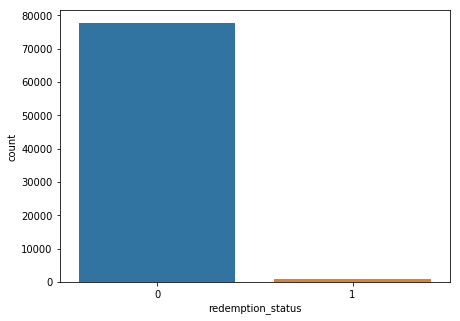

In [55]:
# plotting class distribution
plt.figure(figsize=(7,5))
sns.countplot(x = 'redemption_status', data = train_fin);

## Creating X & y

In [0]:
# Splitting into X and y
X = train_fin.drop(['id', 'redemption_status'], axis = 1)
y = train_fin['redemption_status'].values

## Dividing data into train and validation set

Before training the model, let's split the training data into a training and validation set.

In [57]:
# Dividing data into train and validation set
from sklearn.model_selection import train_test_split

validation_percent = 0.30
test_percent = 0.50
seed = 786

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = validation_percent, random_state = seed, stratify = y)
X_validation, X_test, y_validation, y_test = train_test_split(X_validation, y_validation, test_size = test_percent, random_state = seed, stratify = y_validation)

# Shape of data
print("Number of rows and columns in train dataset:",X_train.shape)
print("Number of rows and columns in validation dataset:",X_validation.shape)
print("Number of rows and columns in test dataset:",X_test.shape)

print("Number of rows and columns in target variable for training:",y_train.shape)
print("Number of rows and columns in target variable for validation:",y_validation.shape)
print("Number of rows and columns in target variable for test:",y_test.shape)

Number of rows and columns in train dataset: (54858, 95)
Number of rows and columns in validation dataset: (11755, 95)
Number of rows and columns in test dataset: (11756, 95)
Number of rows and columns in target variable for training: (54858,)
Number of rows and columns in target variable for validation: (11755,)
Number of rows and columns in target variable for test: (11756,)


In [58]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced'
                                               ,np.unique(y_train)
                                               ,y_train)

class_weight

array([ 0.50469198, 53.78235294])

## Checking various models

In [59]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

seed = 786
LR = LogisticRegression(penalty='l2', class_weight = 'balanced', random_state=seed,C=10)

model_LR = LR.fit(X_train, y_train)

# Scoring based on F1 score for hold out sample
#prob1=model_LR.predict_proba(X_validation)[:,1]
#y_predict_LR=[1 if i > 0.57 else 0 for i in prob1]
y_predict_LR = model_LR.predict(X_validation)

from sklearn.metrics import roc_auc_score, f1_score, classification_report
F1_scores_holdout = f1_score(y_validation, y_predict_LR, average="macro")
AUC_scores_holdout = roc_auc_score(y_validation, y_predict_LR)
print(classification_report(y_validation, y_predict_LR))
print("F1 Score for hold-out sample data:", round(F1_scores_holdout*100,2))
print("AUC Score for hold-out sample data:", round(AUC_scores_holdout*100,2))

              precision    recall  f1-score   support

           0       1.00      0.69      0.81     11646
           1       0.02      0.68      0.04       109

    accuracy                           0.69     11755
   macro avg       0.51      0.68      0.43     11755
weighted avg       0.99      0.69      0.81     11755

F1 Score for hold-out sample data: 42.55
AUC Score for hold-out sample data: 68.25


In [0]:
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier 
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from time import time
from sklearn.metrics import roc_auc_score, f1_score, classification_report

In [0]:
def accuracy_summary(classifier, X_train, y_train, X_validation, y_validation):
    t0 = time()
    model = classifier.fit(X_train, y_train)
    y_pred = model.predict(X_validation)
    train_test_time = time() - t0
    accuracy = roc_auc_score(y_validation, y_pred)
    return accuracy, train_test_time

In [0]:
seed = 123
names = ["Logistic Regression", "LinearDiscriminantAnalysis", "SGDClassifier", "Linear SVC", "LinearSVC with L1-based feature selection",
         "Support Vector Machine with Gaussian kernel","Gaussian NB", "Bernoulli NB", "Ridge Classifier", "Perceptron","Passive-Aggresive", "KNeighborsClassifier","NearestCentroid",
        "DecisionTreeClassifier","RandomForestClassifier","AdaBoostClassifier", "GradientBoostingClassifier", "XGBClassifier"]

classifiers = [
    LogisticRegression(penalty='l2', class_weight = 'balanced', random_state=seed,C=1),
    LinearDiscriminantAnalysis(),
    SGDClassifier(class_weight = 'balanced', random_state=seed),
    LinearSVC(class_weight = 'balanced', random_state=seed),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2", class_weight = 'balanced', random_state=seed))]),
    SVC(random_state=seed, class_weight = 'balanced'),
    GaussianNB(),
    BernoulliNB(),
    RidgeClassifier(class_weight = 'balanced', random_state=seed),
    Perceptron(penalty='l2', class_weight = 'balanced', random_state=seed),
    PassiveAggressiveClassifier(class_weight = 'balanced', random_state=seed),
    KNeighborsClassifier(metric = 'jaccard'),
    NearestCentroid(metric = 'jaccard'),
    DecisionTreeClassifier(criterion = 'gini', random_state = seed, class_weight = 'balanced'),
    RandomForestClassifier(criterion = 'gini', random_state = seed, class_weight = 'balanced'),
    AdaBoostClassifier(random_state = seed),
    GradientBoostingClassifier(random_state = seed),
    XGBClassifier(random_state = seed)
    ]

zipped_clf = zip(names,classifiers)

def classifier_comparator(classifier=zipped_clf):
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        print (c)
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_validation, y_validation)
        result.append((n,clf_accuracy,tt_time))
    return result

In [67]:
classifier_result = classifier_comparator()
classifier_result

Validation result for Logistic Regression
LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Validation result for LinearDiscriminantAnalysis
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
Validation result for SGDClassifier
SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fractio

[('Logistic Regression', 0.6878027971961865, 3.956615686416626),
 ('LinearDiscriminantAnalysis', 0.5086161803792931, 1.480405330657959),
 ('SGDClassifier', 0.5405049101396392, 1.309823989868164),
 ('Linear SVC', 0.5, 23.39900255203247),
 ('LinearSVC with L1-based feature selection', 0.5, 37.34057974815369),
 ('Support Vector Machine with Gaussian kernel',
  0.738985862768175,
  438.2696657180786),
 ('Gaussian NB', 0.6277861280874483, 0.14393281936645508),
 ('Bernoulli NB', 0.49892667010132236, 0.2356553077697754),
 ('Ridge Classifier', 0.6826078804865867, 0.23283171653747559),
 ('Perceptron', 0.5, 0.4332094192504883),
 ('Passive-Aggresive', 0.5082431736218445, 0.311171293258667),
 ('KNeighborsClassifier', 0.5, 324.52094173431396),
 ('NearestCentroid', 0.5, 0.06711292266845703),
 ('DecisionTreeClassifier', 0.5788336192920512, 1.255340576171875),
 ('RandomForestClassifier', 0.5619017909050948, 0.8531427383422852),
 ('AdaBoostClassifier', 0.5, 7.552722692489624),
 ('GradientBoostingClassi

In [68]:
classifier_result_df = pd.DataFrame(classifier_result)
classifier_result_df.columns = ['Classifier', 'AUC Score', 'Train and test time']
classifier_result_df.sort_values(by='AUC Score', ascending=False)

,Classifier,AUC Score,Train and test time
5,Support Vector Machine with Gaussian kernel,0.738986,438.269666
0,Logistic Regression,0.687803,3.956616
8,Ridge Classifier,0.682608,0.232832
6,Gaussian NB,0.627786,0.143933
13,DecisionTreeClassifier,0.578834,1.255341
14,RandomForestClassifier,0.561902,0.853143
2,SGDClassifier,0.540505,1.309824
16,GradientBoostingClassifier,0.513676,23.269210
1,LinearDiscriminantAnalysis,0.508616,1.480405
10,Passive-Aggresive,0.508243,0.311171


In [70]:
seed = 786
clf = SVC(C = 1.0, gamma = 'auto', random_state=seed, class_weight = 'balanced')
clf = clf.fit(X_train, y_train)

y_predict = clf.predict(X_validation)

from sklearn.metrics import roc_auc_score, f1_score, classification_report
F1_scores_holdout = f1_score(y_validation, y_predict, average="macro")
AUC_scores_holdout = roc_auc_score(y_validation, y_predict)
print(classification_report(y_validation, y_predict))
print("F1 Score for hold-out sample data:", round(F1_scores_holdout*100,2))
print("AUC Score for hold-out sample data:", round(AUC_scores_holdout*100,2))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89     11646
           1       0.03      0.68      0.06       109

    accuracy                           0.80     11755
   macro avg       0.51      0.74      0.47     11755
weighted avg       0.99      0.80      0.88     11755

F1 Score for hold-out sample data: 47.27
AUC Score for hold-out sample data: 73.9


In [71]:
y_predict = clf.predict(X_test)

from sklearn.metrics import roc_auc_score, f1_score, classification_report
F1_scores_holdout = f1_score(y_test, y_predict, average="macro")
AUC_scores_holdout = roc_auc_score(y_test, y_predict)
print(classification_report(y_test, y_predict))
print("F1 Score for hold-out sample data:", round(F1_scores_holdout*100,2))
print("AUC Score for hold-out sample data:", round(AUC_scores_holdout*100,2))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88     11646
           1       0.03      0.65      0.06       110

    accuracy                           0.79     11756
   macro avg       0.51      0.72      0.47     11756
weighted avg       0.99      0.79      0.88     11756

F1 Score for hold-out sample data: 46.99
AUC Score for hold-out sample data: 72.45


In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[9253, 2393],
       [  38,   72]])

# Predicting Test data

In [73]:
# Predicting Test data
test_fin = test_fin.drop(['id'], axis = 1)

y_predict_test = clf.predict(test_fin)
Submission = pd.DataFrame()
Submission['id'] = test['id']
Submission['redemption_status'] = y_predict_test


print(Submission['redemption_status'].value_counts())
Submission.head()

0    43002
1     7224
Name: redemption_status, dtype: int64


,id,redemption_status
0,3,1
1,4,0
2,5,1
3,8,0
4,10,0


In [0]:
# Exporting submission file
Submission.to_csv("./Output/Submission_v1.csv", index = False)